# Run  veg_parameters

#### creates all PRMS parameters that characterize vegetation in the model using the LANDFIRE vegetation dataset. These parameters represent cover type, winter and summer cover density, winter and summer interception (snow and rain), and root depth. 

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

#### Values set below are required for running the veg_parameters script.

In [4]:
# Set problem specific variable values for script
veg_type_orig_path = r"..\examples\sagehen\veg\us_140evt.img"
veg_type_field = "VALUE"
veg_type_cellsize = 10
veg_cover_orig_path = r"..\examples\sagehen\veg\us_140evc.img"
veg_cover_cellsize = 10
# specify remap files related to veg cover
cov_type_remap = "covtype.rmp"
covden_sum_remap = "covdensum.rmp"
covden_win_remap = "covdenwin.rmp"

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','veg_type_orig_path',veg_type_orig_path)
Config.set('INPUTS','veg_type_field',veg_type_field)
Config.set('INPUTS','veg_type_cellsize',veg_type_cellsize)
Config.set('INPUTS','veg_cover_orig_path',veg_cover_orig_path)
Config.set('INPUTS','veg_cover_cellsize',veg_cover_cellsize)
Config.set('INPUTS','cov_type_remap',cov_type_remap)
Config.set('INPUTS','covden_sum_remap',covden_sum_remap)
Config.set('INPUTS','covden_win_remap',covden_win_remap)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArpcy script veg_parameters.

In [6]:
# Set and run veg_parameters script
script = r"veg_parameters.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

#### PRMS represents four cover types: 1=grasses, 2=shrubs, 3= deciduous trees, 4=coniferous trees. Although there are many types of vegetation that are classified in LANDFIRE, these types are "remapped" to one of the four types represented in PRMS. 

   #### Here is a Google Earth image showing vegetation cover in the watershed. Note that the watershed has the least vegetation density near streams.
   
   <img src=".\captures\sagehen_GE_veg.png" style="float: left" width="500">

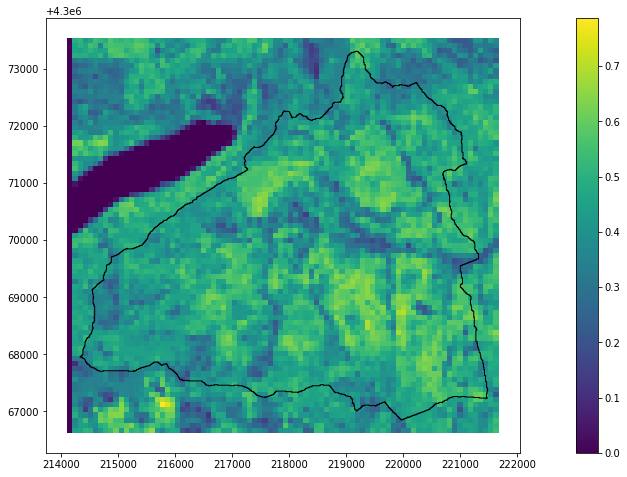

In [7]:
# Plot the winter vegetation cover
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
hru_params=geopandas.read_file(fn2)
hru_params.plot(column="COVDEN_WIN",ax=ax,legend=True)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()

## Class Exersize:


#### Plot the vegetation type cover. What is the dominant type of vegetation cover at Sagehen?